In [1]:
pip install tensorflow scikit-learn


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\python312\lib\site-packages (2.16.1)




[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


In [8]:
import pandas as pd
boston = pd.read_csv("boston_housing.csv")

boston.columns



Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'MEDV'],
      dtype='object')

In [9]:
# Features (independent variables)
X = boston.drop("MEDV", axis=1)

# Target (house price)
y = boston["MEDV"]

In [10]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Linear output
])


C:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [14]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1, verbose=1)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 553.9057 - mae: 21.7011 - val_loss: 531.1407 - val_mae: 21.5265
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 503.0229 - mae: 20.6234 - val_loss: 468.6183 - val_mae: 20.0723
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 456.1341 - mae: 19.2219 - val_loss: 389.1938 - val_mae: 18.0736
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 340.1829 - mae: 16.5871 - val_loss: 290.2993 - val_mae: 15.2332
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 287.5855 - mae: 14.4692 - val_loss: 182.4412 - val_mae: 11.4867
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 172.3899 - mae: 10.4721 - val_loss: 99.1751 - val_mae: 7.5070
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 85.6957 - mae: 6.5701 - val_loss: 58.5424 - val_mae: 5.0242
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 63.6657 - mae: 5.8691 - val_loss: 45.4441 - val_mae: 4.2442
Epoch 9/100
12/12 ━━━━━━━

In [15]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error on Test Data: {mae}")


Mean Absolute Error on Test Data: 2.3238043785095215


In [16]:
predictions = model.predict(X_test)
print("Predicted House Prices:", predictions[:5].flatten())
print("Actual House Prices:   ", y_test[:5])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predicted House Prices: [27.137383 34.45453  15.640685 26.61086  16.614904]
Actual House Prices:    173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: MEDV, dtype: float64


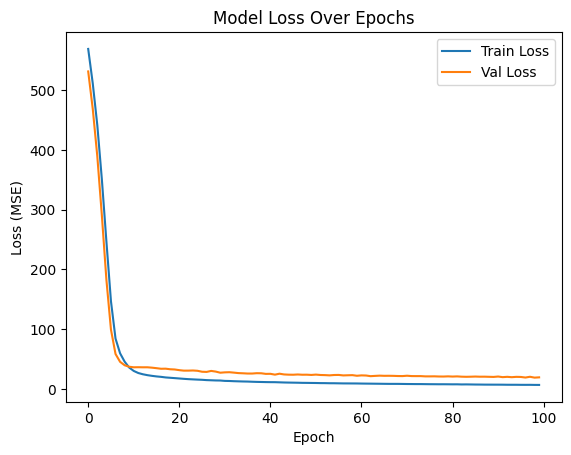

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()
